The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
True interesting:  111 		 0.7937


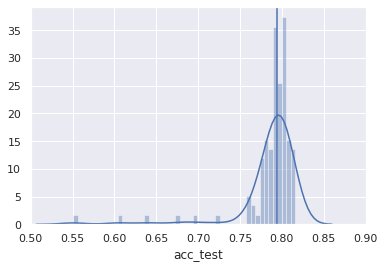

False Weak:  1943 		 0.786085


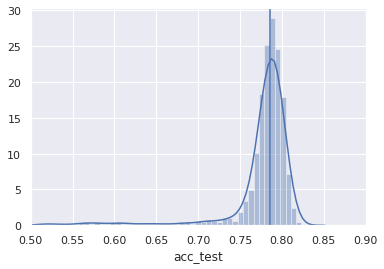

In [87]:
%load_ext lab_black
import pickle
from tabulate import tabulate
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns, numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sns.set()
rug = False
bins = 50


with open("200er_results.pickle", "rb") as f:
    table = pickle.load(f)

df = pd.DataFrame(table)
ax1 = sns.distplot(
    df.loc[df["interesting?"] == True]["acc_test"],
    label="interesting",
    rug=rug,
    bins=bins,
)
print(
    "True interesting: ",
    len(df.loc[df["interesting?"] == True]),
    "\t\t",
    df.loc[df["interesting?"] == True]["acc_test"].median(),
)
ax1.set_xlim(0.5, 0.9)
ax1.axvline(df.loc[df["interesting?"] == True]["acc_test"].median())
plt.show()
plt.clf()


print(
    "False Weak: ",
    len(df.loc[df["interesting?"] == False]),
    "\t\t",
    df.loc[df["interesting?"] == False]["acc_test"].median(),
)
ax2 = sns.distplot(
    df.loc[df["interesting?"] == False]["acc_test"],
    label="Not interesting",
    rug=rug,
    bins=bins,
)
ax2.set_xlim(0.5, 0.9)
ax2.axvline(df.loc[df["interesting?"] == False]["acc_test"].median())
plt.show()


# display(HTML(tabulate(table, headers="keys", tablefmt="html")))

True Weak:  111 		 0.7937


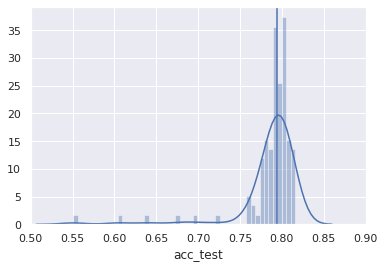

False Weak:  1943 		 0.786085


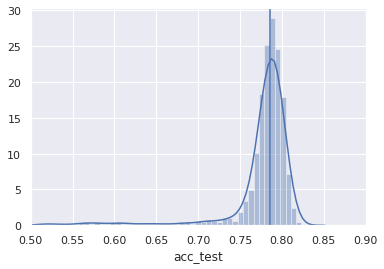

In [88]:
import pickle
from tabulate import tabulate
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns, numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sns.set()
rug = False
bins = 50


with open("200er_results.pickle", "rb") as f:
    table = pickle.load(f)

df = pd.DataFrame(table)
ax1 = sns.distplot(
    df.loc[df["weak?"] == True]["acc_test"], label="weak", rug=rug, bins=bins,
)
print(
    "True Weak: ",
    len(df.loc[df["weak?"] == True]),
    "\t\t",
    df.loc[df["weak?"] == True]["acc_test"].median(),
)
ax1.set_xlim(0.5, 0.9)
ax1.axvline(df.loc[df["weak?"] == True]["acc_test"].median())
plt.show()
plt.clf()


print(
    "False Weak: ",
    len(df.loc[df["weak?"] == False]),
    "\t\t",
    df.loc[df["weak?"] == False]["acc_test"].median(),
)
ax2 = sns.distplot(
    df.loc[df["weak?"] == False]["acc_test"], label="Not weak", rug=rug, bins=bins,
)
ax2.set_xlim(0.5, 0.9)
ax2.axvline(df.loc[df["weak?"] == False]["acc_test"].median())
plt.show()

# display(HTML(tabulate(table, headers="keys", tablefmt="html")))

True Weak:  818 		 0.783662


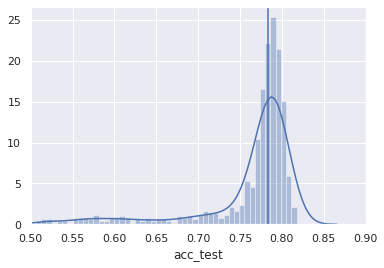

False Weak:  1236 		 0.787816


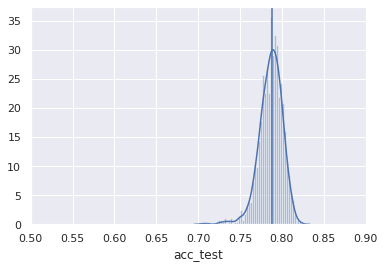

In [84]:
import pickle
from tabulate import tabulate
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns, numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sns.set()
rug = False
bins = 50


with open("200er_results.pickle", "rb") as f:
    table = pickle.load(f)

df = pd.DataFrame(table)
ax1 = sns.distplot(
    df.loc[df["true_weak?"] == True]["acc_test"], label="true_weak", rug=rug, bins=bins,
)
print(
    "True Weak: ",
    len(df.loc[df["true_weak?"] == True]),
    "\t\t",
    df.loc[df["true_weak?"] == True]["acc_test"].median(),
)
ax1.set_xlim(0.5, 0.9)
ax1.axvline(df.loc[df["true_weak?"] == True]["acc_test"].median())
plt.show()
plt.clf()


print(
    "False Weak: ",
    len(df.loc[df["true_weak?"] == False]),
    "\t\t",
    df.loc[df["true_weak?"] == False]["acc_test"].median(),
)
ax2 = sns.distplot(
    df.loc[df["true_weak?"] == False]["acc_test"],
    label="Not true_weak",
    rug=rug,
    bins=bins,
)
ax2.set_xlim(0.5, 0.9)
ax2.axvline(df.loc[df["true_weak?"] == False]["acc_test"].median())
plt.show()

# display(HTML(tabulate(table, headers="keys", tablefmt="html")))